## Crypto_Model notebook for creating html (or pdf) files

In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

In [2]:
#import required modules
#be sure to set your $PYTHONPATH!
#else, try this:

import sys
sys.path.append('../../lib')
sys.path.append('../../bin')

from model import MODEL
import utils, plotting, fstats, fstats_pct_chg
import pandas as pd

In [3]:
#your intra-day time at which to evaluate the model.
day_hour = 18
#your tickers of interest
tickers = ['BTC-USD']

In [4]:
#do not edit below this cell!

In [5]:
#specify dates:
todays_date = pd.Timestamp.today()
start_date = todays_date - pd.Timedelta('200 days')
filter_date = start_date.floor(freq='D').replace(hour=day_hour)
#get data:
model = MODEL(tickers=tickers)
model.get_data(start=start_date, interval='60m')
#filter by datetime:
date_range = utils.create_date_range(start_date=filter_date)
model.apply_date_filter(date_range, force_apply=True)

[*********************100%***********************]  1 of 1 completed
[INFO]: filter applied.


In [6]:
#evaluate model:
model.eval_model()

|                                 PRICE MODEL                                  |
|                                 Version 1.0                                  |
|                  Authors: Marco Rosenzweig & Patrick Lorenz                  |
--------------------------------------------------------------------------------
|                             ticker = ['BTC-USD']                             |
|                            start date = 02/26/20                             |
|                             end date = 09/13/20                              |
|                     initial investment per ticker = 200                      |
[INIT]: Initialising model for tickers: ['BTC-USD']
[INIT]: Successfully initialized model.
********************************************************************************
[TICKER]: BTC-USD
[INFO]: No tax paid.
--------------------------------------------------------------------------------
[SUMMARY]: Average trade win: 5.0412874212%
[SUMMARY]: Aver

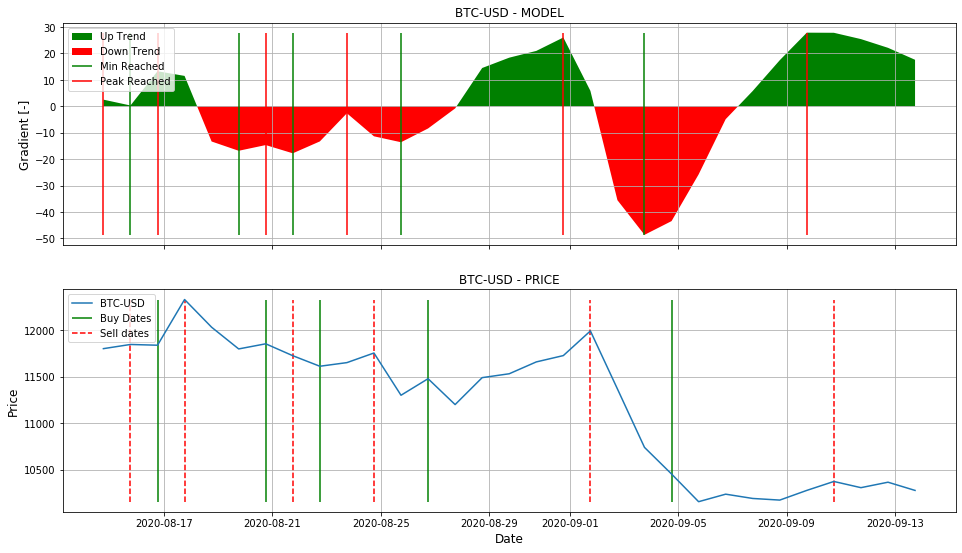

In [11]:
#plotting:
plot_date = todays_date - pd.Timedelta('30 days')
plot_start = str(plot_date.date())
plotting.plot_model(model, tickers='BTC-USD', plot_from_date=plot_start)

In [12]:
#Computing break values:
imag_model = model.copy_model()
imag_model.append_timedelta(timedelta=1)
imag_model.comp_break_values(tickers='all', parallel_computing=True)
imag_model._init_model()

[INFO]: New data was appended.
[INFO]: Compute break values with 30.00% deviation
[INFO]: Current ticker: BTC-USD
[INFO]: Using 10 processes.
[INFO]: Current values: {'BTC-USD': 10276.59375}
[INFO]: Break values: {'BTC-USD': array([10290.98098125, 10432.797975  ])}
[INFO]: Tolerances: {'BTC-USD': array([ 14.38723125, 156.204225  ])}
[INIT]: Initialising model for tickers: ['BTC-USD']
[INIT]: Successfully initialized model.
********************************************************************************


[INFO]: Current ticker: BTC-USD
--------------------------------------------------------------------------------
[INFO]: Result for value: 10162.34371898433


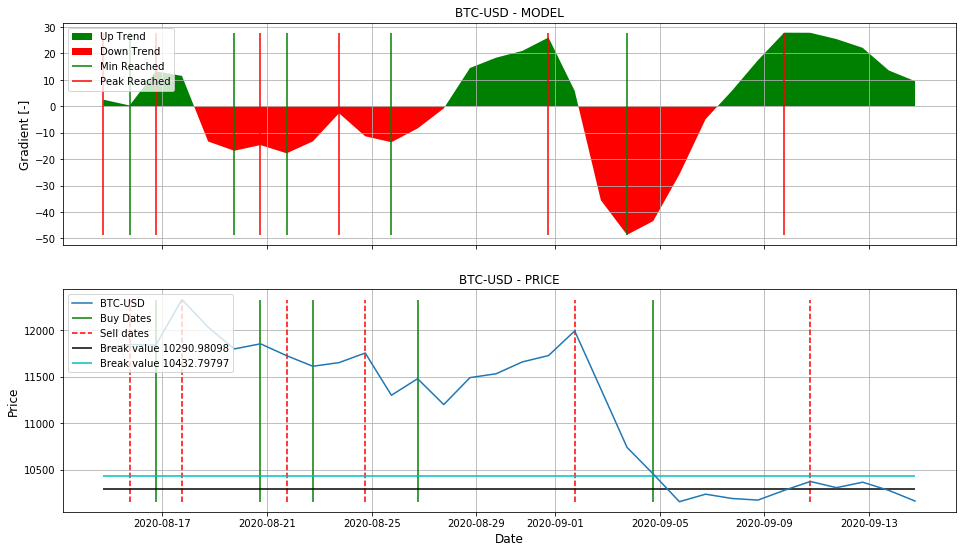

--------------------------------------------------------------------------------
[INFO]: Result for value: 10361.889478124951


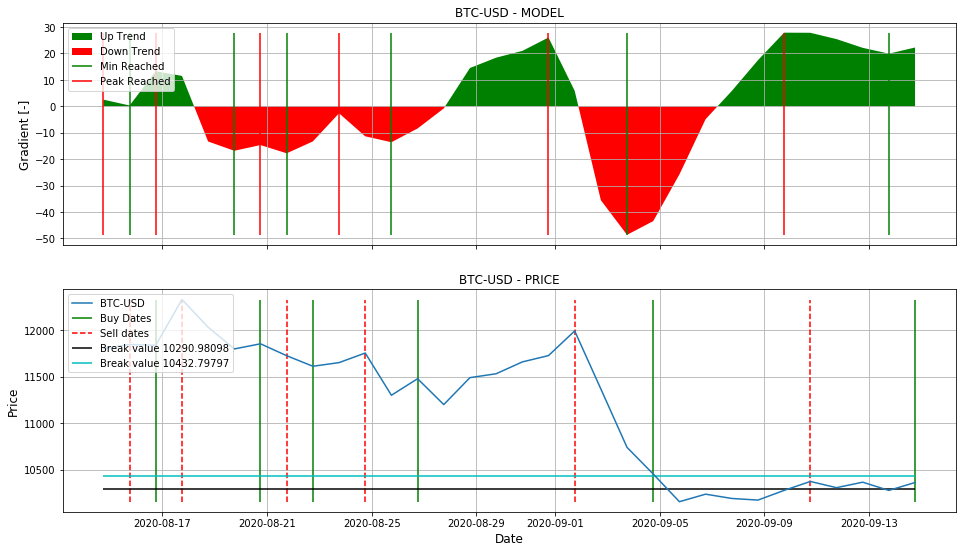

--------------------------------------------------------------------------------
[INFO]: Result for value: 10563.207949687448


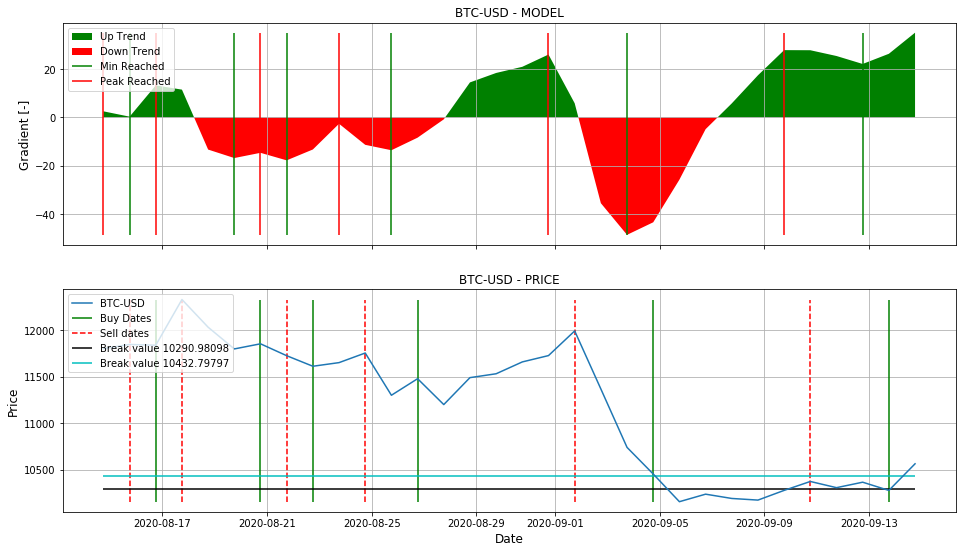

In [13]:
#plotting possible break value situations:
imag_model.show_possibilities(plot_from_date=plot_start, switch_axes=False)

[INFO]: Current ticker: BTC-USD
[*********************100%***********************]  1 of 1 completed
[STATS-INFO]: Auto update of tolerances!
[*********************100%***********************]  1 of 1 completed
[STATS-INFO]: Current value: 10283.9521484375!
[STATS-INFO]: New tolerances: [  7.02883281 148.84582656]!
[STATS-EVAL]: Probability for tol=0.00068: 48.38%
[STATS-EVAL]: Probability for tol=0.01447: 36.49%
[STATS-EVAL]: Probability between: 11.89%


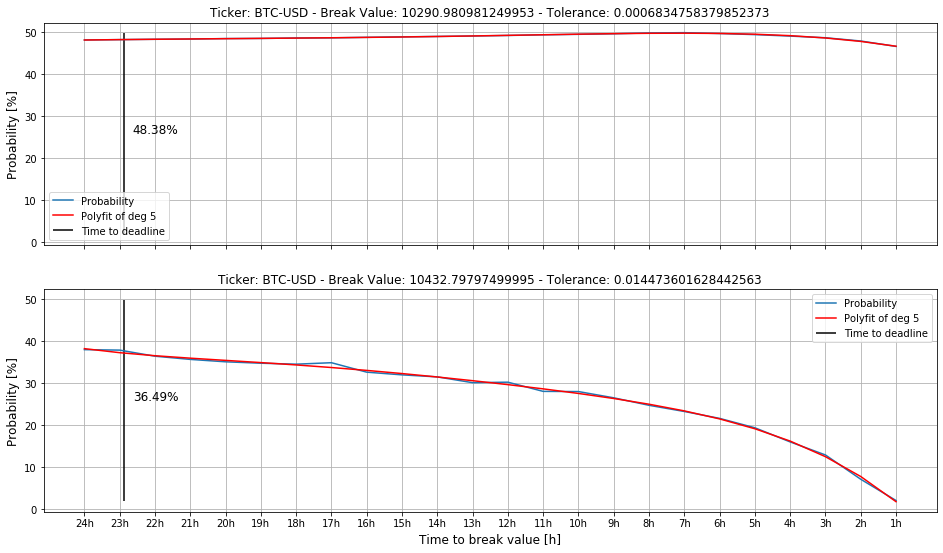

In [14]:
#calculate statistics:
fstats_pct_chg.calc_probs(model=imag_model, tickers='all', auto_update_tolerances=True)